# Data Science - Micro Projects
## Model Development (Predicting the average price of a car)
### Charles Mawusi - University of Bordeaux 

In this project develops several models that will predict the price of the car using the variables or features.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression and Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [12]:
# Create the linear regression object 

lm = LinearRegression ()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# How could Highway-mpg help us predict car price? SLR I reporeted coefficents, intercept and R-squared
Y = df["price"]
X = df[["highway-mpg"]]
model_ols = lm.fit(X, Y)

In [26]:
print("coefficients is {} and intercept is {}  and the R-squared is {} ".format(model_ols.coef_, model_ols.intercept_ , lm.score(X,Y))  )

coefficients is [-821.73337832] and intercept is 38423.305858157386  and the R-squared is 0.4965911884339175 


In [28]:
# How could Highway-mpg help us predict car price? SLR I reporeted coefficents, intercept and R-squared
Y= df["price"]
X= df[["engine-size"]]
model = lm.fit(X, Y)

In [29]:
print("coefficients is {} and intercept is {}  and the R-squared is {} ".format(model.coef_, model.intercept_ , lm.score(X,Y))  )

coefficients is [166.86001569] and intercept is -7963.338906281049  and the R-squared is 0.7609686443622008 


In [53]:
# Using more features or regressors 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
model1 = lm.fit(Z, df['price'])

In [54]:
print("coefficients is {} and intercept is {}  and the R-squared is {} ".format(model1.coef_, model1.intercept_ , lm.score(Z,df['price']))  )

coefficients is [53.49574423  4.70770099 81.53026382 36.05748882] and intercept is -15806.624626329198  and the R-squared is 0.8093562806577457 


###  Model Evaluation using Visualization

In [55]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48269.63546468806)

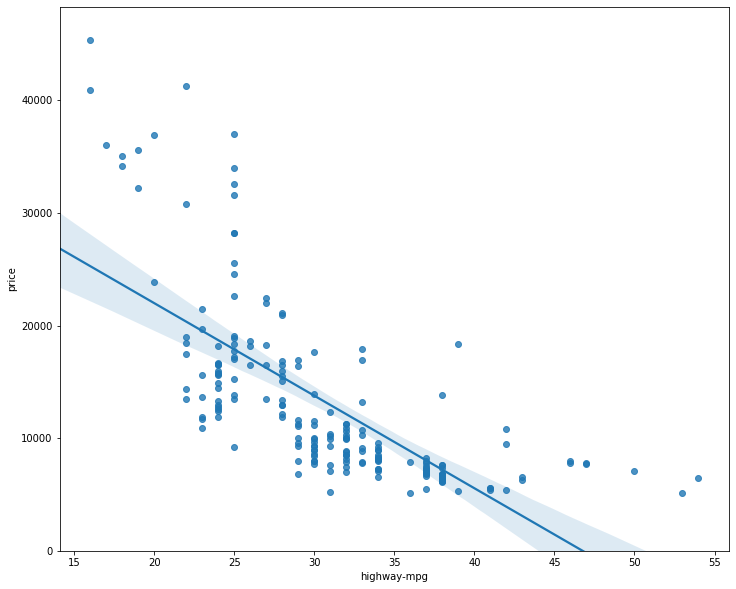

In [56]:
# Regression Plot,  Let's visualize Horsepower as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

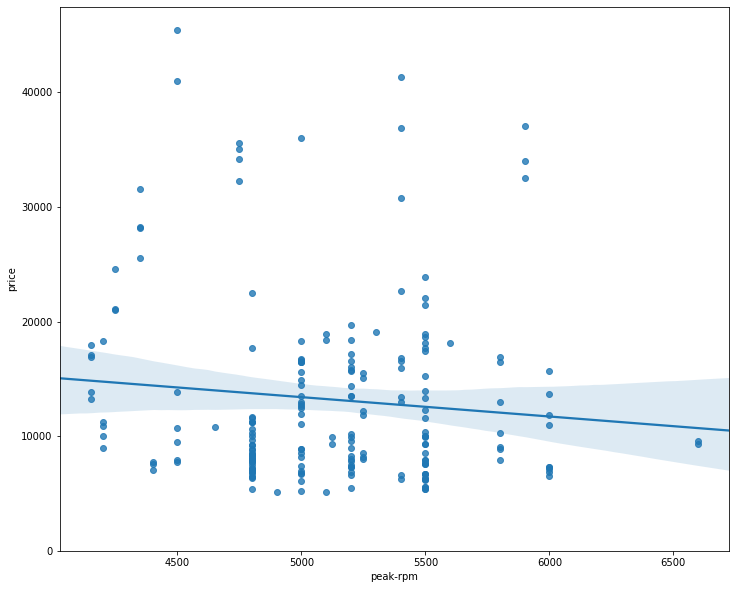

In [57]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [58]:
# Correlation between hihway mpg and peak-rpm
matrix = df[["highway-mpg",  "peak-rpm"]].corr()
matrix

,highway-mpg,peak-rpm
highway-mpg,1.000000,-0.058598
peak-rpm,-0.058598,1.000000


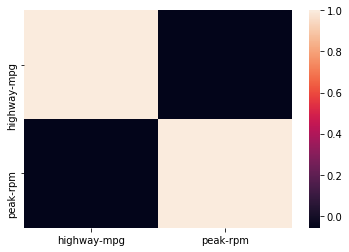

In [59]:
sns.heatmap(matrix , xticklabels=matrix.columns, yticklabels=matrix.columns)

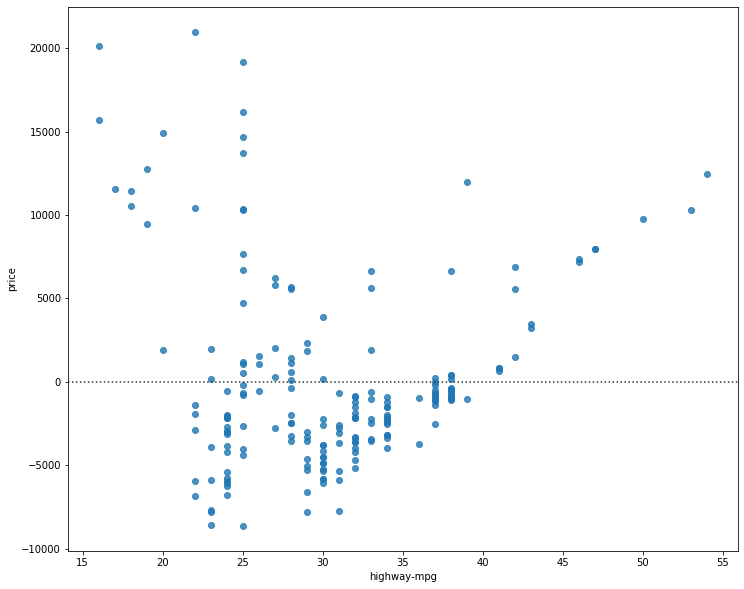

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()
# Here the residual plot seem to be unevely distributed (more like a quadratic shape we may have to consider non linear models)

#### lets predict the model above 

In [61]:
Y_hat = model1.predict(Z)
Y_hat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

### Density Plots actual Vs Predicted 

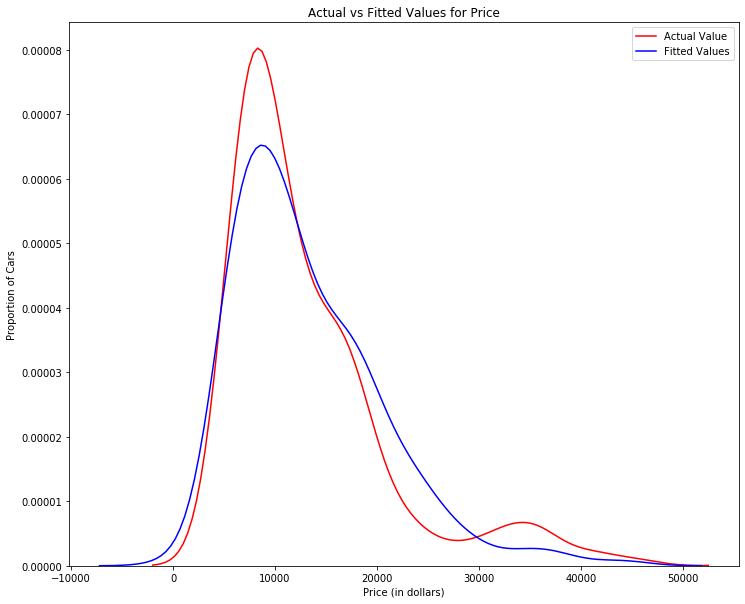

In [62]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial Regression and Pipelines

In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [68]:
x = df['highway-mpg']
y = df['price']

In [69]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


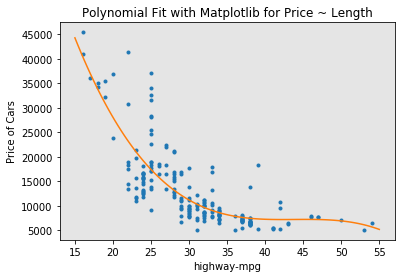

In [70]:
PlotPolly(p, x, y, 'highway-mpg')

In [71]:
#  polynomial transformation on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [72]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

In [73]:
Z_pr=pr.fit_transform(Z)

In [75]:
Z.shape

(201, 4)

In [76]:
# here the transformation resulted in 15 newly created variables 
Z_pr.shape

(201, 15)

### Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [80]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [81]:
poly=pipe.fit(Z,y)
poly

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [82]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Goodness of Fit and model - Measures for In-Sample Evaluation (R squared and MSE)

In [84]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [85]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [88]:
# R squared and MSE for multiple regression 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [90]:
# for pylynomial models
from sklearn.metrics import r2_score

In [92]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


# Model Evaluation (out of sample)

In [93]:
import pandas as pd
import numpy as np

In [95]:
# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [96]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [100]:
%%capture
! pip install ipywidgets

In [101]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

###  Functions for plotting

In [102]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [103]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Part 1: Training and Testing

In [119]:
datacopy = df.copy()
y_data = df['price']
x_data=df.drop('price',axis=1)

In [121]:
# split data set randomly 
from sklearn.model_selection import train_test_split

In [124]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [127]:
print("numer of samples of training data = {}".format(x_data.shape[0]))
print("numer of samples of Testing data = {}".format(x_test.shape[0]))

numer of samples of training data = 201
numer of samples of Testing data = 31


In [128]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size =0.40, random_state=0)

In [ ]:
# import linear regression model 
from sklearn.linear_model import LinearRegression

In [129]:
lre=LinearRegression()

In [145]:
# Fitting model with horsepower as dependent variable training data set 
model_lr=lre.fit(x_train[['horsepower']], y_train)
print(" The intercept is {} | coeficient is {} |R-square is {}".format(model_lr.intercept_, model_lr.coef_, model_lr.score(x_train[['horsepower']], y_train)))

 The intercept is -4157.133340241195 | coeficient is [168.08214765] |R-square is 0.6449517437659684


### Cross Validation 
Sometimeswe may not have sufficient testing data; as a result, we may want to perform Cross-validation. 

In [151]:
from sklearn.model_selection import cross_val_score

In [157]:
# R-scores for the cross validation
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [158]:
print("The mean of the folds are {} and the standard deviation is {}".format(Rcross.mean() , Rcross.std()))

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [159]:
from sklearn.model_selection import cross_val_predict

In [160]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])